In [1]:
import pandas
import numpy as np
import matplotlib
%matplotlib inline

## 1. Fetch data

In [2]:
path = "/home/user/Downloads/"
current_year_file = "NYPD_Complaint_Data_Current_YTD.csv"
#old_years_file = "NYPD_Complaint_Data_Historic.csv"
current_year_data = pandas.read_csv(path + current_year_file)
#old_data = pandas.read_csv(path + old_years_file)

In [3]:
#data = pandas.concat( [current_year_data,old_data])
data = current_year_data

In [4]:
data = data.sample(frac=0.20)

In [5]:
#look at the data
print(data.columns)
data.head(6)

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
97585,425630910,07/20/2017,13:58:00,07/20/2017,14:04:00,07/20/2017,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,20.0,OPPOSITE OF,STREET,NaN,NaN,987189.0,220929.0,40.773083,-73.989390,"(40.773083147, -73.989390453)"
227363,490400574,04/13/2017,10:00:00,04/13/2017,15:00:00,04/13/2017,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",...,68.0,FRONT OF,STREET,NaN,NaN,977483.0,169719.0,40.632522,-74.024382,"(40.632521623, -74.024381631)"
328804,481977407,01/19/2017,15:20:00,01/19/2017,16:34:00,01/19/2017,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,43.0,FRONT OF,STREET,NaN,NaN,1020999.0,244291.0,40.837129,-73.867195,"(40.837129445, -73.867194698)"
302571,407416345,02/09/2017,12:30:00,02/09/2017,13:10:00,02/09/2017,348,VEHICLE AND TRAFFIC LAWS,916.0,LEAVING SCENE-ACCIDENT-PERSONA,...,83.0,NaN,STREET,NaN,NaN,1005062.0,191879.0,40.693324,-73.924951,"(40.693324049, -73.924951457)"
186412,223371267,05/15/2017,08:50:00,05/15/2017,09:00:00,05/15/2017,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",...,105.0,INSIDE,GROCERY/BODEGA,NaN,NaN,1052919.0,182160.0,40.666406,-73.752474,"(40.66640577, -73.752474342)"
3430,383927174,09/28/2017,01:00:00,09/28/2017,01:10:00,09/28/2017,344,ASSAULT 3 & RELATED OFFENSES,114.0,OBSTR BREATH/CIRCUL,...,75.0,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,UNITY PLAZA (SITES 4-27),1012521.0,182427.0,40.667360,-73.898093,"(40.667359783, -73.89809329)"


In [6]:
def printStats(data):
    print("Crime Info:")
    print("\tNumber of complaints:\t\t\t\t {0:d}".format( len(data['CMPLNT_NUM'].unique()) ))
    print("\tStatus of crime:\t\t\t\t",end=" ")
    print( data['CRM_ATPT_CPTD_CD'].unique() )
    print("\tSeverity of the crime:\t\t\t\t", end=" ")
    print( data['LAW_CAT_CD'].unique() )
    print("\tBorough of crimes:\t\t\t\t", end=" ")
    print( data['BORO_NM'].unique() )
    print("\tNumber of Complaint Descriptors:\t\t", end = " ")
    print( len(data['KY_CD'].unique()) )
    print("\tNumber of Specific Complaint Descriptors:\t", end = " ")
    print( len(data['PD_CD'].unique()))

In [7]:
#Look at some stats
printStats(data)

Crime Info:
	Number of complaints:				 70302
	Status of crime:				 ['COMPLETED' 'ATTEMPTED']
	Severity of the crime:				 ['MISDEMEANOR' 'FELONY' 'VIOLATION']
	Borough of crimes:				 ['MANHATTAN' 'BROOKLYN' 'BRONX' 'QUEENS' 'STATEN ISLAND']
	Number of Complaint Descriptors:		 58
	Number of Specific Complaint Descriptors:	 305


## 2. Clean the data

Reduce columns to only necessary ones.

Note:
The following are codes and their descriptions.
* KY_CD - OFNS_DESC
* PD_CD - PD_DESC

In [8]:
columns = ['CMPLNT_NUM','CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'KY_CD', 'PD_CD',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'Latitude', 'Longitude']
dataF = data[columns]
dataF.head(6)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,KY_CD,PD_CD,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,Latitude,Longitude
97585,425630910,07/20/2017,13:58:00,235,567.0,COMPLETED,MISDEMEANOR,MANHATTAN,40.773083,-73.989390
227363,490400574,04/13/2017,10:00:00,351,258.0,COMPLETED,MISDEMEANOR,BROOKLYN,40.632522,-74.024382
328804,481977407,01/19/2017,15:20:00,106,109.0,COMPLETED,FELONY,BRONX,40.837129,-73.867195
302571,407416345,02/09/2017,12:30:00,348,916.0,COMPLETED,MISDEMEANOR,BROOKLYN,40.693324,-73.924951
186412,223371267,05/15/2017,08:50:00,341,333.0,COMPLETED,MISDEMEANOR,QUEENS,40.666406,-73.752474
3430,383927174,09/28/2017,01:00:00,344,114.0,COMPLETED,MISDEMEANOR,BROOKLYN,40.667360,-73.898093


For columns where the value should not be nan we will drop the row.

In [9]:
dataFN = dataF.dropna(subset=['KY_CD','Latitude','Longitude','CMPLNT_FR_DT','CMPLNT_FR_TM', 'BORO_NM'], how='any')
printStats(dataFN)

Crime Info:
	Number of complaints:				 69066
	Status of crime:				 ['COMPLETED' 'ATTEMPTED']
	Severity of the crime:				 ['MISDEMEANOR' 'FELONY' 'VIOLATION']
	Borough of crimes:				 ['MANHATTAN' 'BROOKLYN' 'BRONX' 'QUEENS' 'STATEN ISLAND']
	Number of Complaint Descriptors:		 57
	Number of Specific Complaint Descriptors:	 288


Normalize coordinates.

In [10]:

dataFN=dataFN.assign(x = np.cos(dataFN['Latitude']) * np.cos(dataFN['Longitude']) )
dataFN=dataFN.assign(y = np.cos(dataFN['Latitude']) * np.sin(dataFN['Longitude']) )
dataFN=dataFN.assign(z = np.sin(dataFN['Latitude']) )

In [11]:
dataFN.head(6)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,KY_CD,PD_CD,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,Latitude,Longitude,x,y,z
97585,425630910,07/20/2017,13:58:00,235,567.0,COMPLETED,MISDEMEANOR,MANHATTAN,40.773083,-73.989390,-0.160887,-0.984657,0.067570
227363,490400574,04/13/2017,10:00:00,351,258.0,COMPLETED,MISDEMEANOR,BROOKLYN,40.632522,-74.024382,-0.191458,-0.959493,0.206682
328804,481977407,01/19/2017,15:20:00,106,109.0,COMPLETED,FELONY,BRONX,40.837129,-73.867195,-0.039757,-0.999203,0.003575
302571,407416345,02/09/2017,12:30:00,348,916.0,COMPLETED,MISDEMEANOR,BROOKLYN,40.693324,-73.924951,-0.096314,-0.984459,0.146847
186412,223371267,05/15/2017,08:50:00,341,333.0,COMPLETED,MISDEMEANOR,QUEENS,40.666406,-73.752474,0.073748,-0.982083,0.173418
3430,383927174,09/28/2017,01:00:00,344,114.0,COMPLETED,MISDEMEANOR,BROOKLYN,40.667360,-73.898093,-0.069549,-0.982555,0.172478


Define an encoding function that will be useful when we want to keep and encode nan's.

In [12]:
def encodeColVals(colList, val):
    for i in colList:
        dataFN[i].fillna(value = val, inplace=True)
        print(dataFN[i].unique())
        _, dataFN[i] = np.unique( dataFN[i], return_inverse=True)

Look at the makeup of the data we have

In [13]:
for i in dataFN.columns:
    print(i,end="\t")
    print(dataFN[i].unique())

CMPLNT_NUM	[425630910 490400574 481977407 ..., 682568759 932639837 785121838]
CMPLNT_FR_DT	['07/20/2017' '04/13/2017' '01/19/2017' '02/09/2017' '05/15/2017'
 '09/28/2017' '04/07/2017' '09/01/2017' '07/01/2017' '05/30/2017'
 '01/01/2017' '06/26/2017' '07/11/2017' '09/26/2017' '08/13/2017'
 '04/18/2017' '09/27/2017' '05/10/2017' '07/23/2017' '07/19/2017'
 '01/28/2017' '02/16/2017' '08/02/2017' '02/03/2017' '08/05/2017'
 '04/19/2017' '07/31/2017' '02/13/2017' '08/09/2017' '08/01/2017'
 '05/22/2017' '05/17/2017' '09/08/2017' '03/21/2017' '03/11/2017'
 '06/25/2017' '05/16/2017' '02/12/2017' '05/14/2017' '06/08/2017'
 '08/25/2017' '08/07/2017' '06/18/2017' '08/20/2017' '05/28/2017'
 '06/01/2017' '07/25/2017' '04/04/2017' '02/14/2017' '04/01/2017'
 '01/13/2017' '06/14/2017' '09/16/2017' '02/23/2017' '08/30/2017'
 '05/04/2017' '05/07/2017' '04/24/2017' '01/23/2017' '03/17/2017'
 '04/22/2017' '03/28/2017' '09/14/2017' '04/23/2017' '02/21/2017'
 '06/22/2017' '03/02/2017' '06/04/2017' '09/24/2017

Encode the time column into useful features

In [14]:
dataFN.replace(to_replace='24:00:00', value='00:00:00', inplace=True)

dataFN['CMPLNT_FR_TM'] = pandas.to_datetime(dataFN['CMPLNT_FR_TM'], utc = True)

dataFN['hour'] = dataFN['CMPLNT_FR_TM'].dt.hour
dataFN['minute'] = dataFN['CMPLNT_FR_TM'].dt.minute
dataFN['second'] = dataFN['CMPLNT_FR_TM'].dt.second
dataFN['is_business_hours'] = dataFN['hour'] > 8 | ( (dataFN['hour'] < 4) & (dataFN['minute'] < 30))

dataFN.drop('CMPLNT_FR_TM', axis=1, inplace=True)

Encode the date column into useful features

In [15]:
dataFN = dataFN[dataFN['CMPLNT_FR_DT'].str.slice(6,8) != '10']
dataFN['CMPLNT_FR_DT'] = pandas.to_datetime(dataFN['CMPLNT_FR_DT'], utc = True)

dataFN['weekday'] = dataFN['CMPLNT_FR_DT'].dt.dayofweek
dataFN['year'] = dataFN['CMPLNT_FR_DT'].dt.year
dataFN['month'] = dataFN['CMPLNT_FR_DT'].dt.month
dataFN['day'] = dataFN['CMPLNT_FR_DT'].dt.day
dataFN['is_month_start'] = dataFN['CMPLNT_FR_DT'].dt.is_month_start
dataFN['is_month_end'] = dataFN['CMPLNT_FR_DT'].dt.is_month_end
dataFN['is_quarter_start'] = dataFN['CMPLNT_FR_DT'].dt.is_quarter_start
dataFN['is_quarter_end'] = dataFN['CMPLNT_FR_DT'].dt.is_quarter_end
dataFN['is_year_start'] = dataFN['CMPLNT_FR_DT'].dt.is_year_start
dataFN['is_year_end'] = dataFN['CMPLNT_FR_DT'].dt.is_year_end

dataFN.drop('CMPLNT_FR_DT', axis=1, inplace=True)

There are nans in many columns. For columns where it is allowed we will encode using the function defined earlier.

In [16]:
encodeColVals(['PD_CD'], -1)
encodeColVals(['LAW_CAT_CD', 'CRM_ATPT_CPTD_CD', 'BORO_NM'], 'Unknown')
dataFN.head(6)

[ 567.  258.  109.  916.  333.  114.  638.  366.  101.  639.  637.  349.
  198.  321.  213.  254.  338.  357.  749.  511.  259.  117.  313.  462.
  410.  339.  404.  750.  759.  205.  739.  106.  386.  782.  441.  512.
  475.  494.  438.  878.  305.  401.  905.  729.  267.  451.  478.  707.
  793.  113.  402.  416.  493.  907.  269.  343.  221.  420.  457.  419.
  263.  405.  344.  115.  223.  421.  705.  105.  643.  443.  430.  922.
  397.  566.  412.  351.  422.  406.  256.  661.  388.  273.  718.  425.
  411.  415.  384.  398.  748.  503.  500.  204.  264.  665.  649.  439.
  433.  387.  544.  389.  501.  307.  403.  424.  407.  461.  477.  490.
  779.  502.  792.  432.  760.  231.  291.  888.  569.  396.  521.  409.
  209.  723.  408.  418.  568.  203.  809.  303.  762.  183.   -1.  199.
  335.  391.  781.  640.  817.  224.  347.  437.  708.  847.  382.  390.
  201.  827.  301.  725.  181.  417.  233.  383.  466.  234.  548.  802.
  211.  277.  515.  112.  268.  507.  399.  361.  7

,CMPLNT_NUM,KY_CD,PD_CD,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,Latitude,Longitude,x,y,...,weekday,year,month,day,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
97585,425630910,235,191,1,1,2,40.773083,-73.989390,-0.160887,-0.984657,...,3,2017,7,20,False,False,False,False,False,False
227363,490400574,351,47,1,1,1,40.632522,-74.024382,-0.191458,-0.959493,...,3,2017,4,13,False,False,False,False,False,False
328804,481977407,106,6,1,0,0,40.837129,-73.867195,-0.039757,-0.999203,...,3,2017,1,19,False,False,False,False,False,False
302571,407416345,348,285,1,1,1,40.693324,-73.924951,-0.096314,-0.984459,...,3,2017,2,9,False,False,False,False,False,False
186412,223371267,341,71,1,1,3,40.666406,-73.752474,0.073748,-0.982083,...,0,2017,5,15,False,False,False,False,False,False
3430,383927174,344,11,1,1,1,40.667360,-73.898093,-0.069549,-0.982555,...,3,2017,9,28,False,False,False,False,False,False


We should sort the data so that we are looking at old data and predicting new data from it. This is necessary because we scrambled the order of the rows when selected a fraction of them earlier.

In [17]:
dataFN.sort_values(['year', 'month', 'day'], inplace=True)

# 3. Classification

Divide up the data into a target variable and predictors

In [18]:
y = dataFN['KY_CD']
y = y.as_matrix()
classes = dataFN['KY_CD'].unique()
numClasses = len(dataFN['KY_CD'].unique())
x = dataFN.drop(['CMPLNT_NUM','KY_CD', 'PD_CD','CRM_ATPT_CPTD_CD', 'LAW_CAT_CD','Latitude', 'Longitude'], axis=1)
print(x.head(6))
print(x.columns)
x = x.as_matrix()

        BORO_NM         x         y         z  hour  minute  second  \
204003        1 -0.152264 -0.975031  0.161651    23      55       0   
281202        0 -0.066548 -0.997730  0.010310     7      40       0   
71465         2 -0.156201 -0.984762  0.076451     0       0       0   
82310         0 -0.018964 -0.999352 -0.030604    22      35       0   
278550        0 -0.065718 -0.997613 -0.021183     3      15       0   
137904        2 -0.155871 -0.984208  0.083898     0       1       0   

        is_business_hours  weekday  year  month  day  is_month_start  \
204003               True        6  1977      5    1            True   
281202               True        6  1983      1   23           False   
71465               False        0  1990      1    1            True   
82310                True        4  1992      7   31           False   
278550               True        3  1998     10    1            True   
137904              False        0  2001      1    1            True  

Divide the data up into training and test data

In [19]:
size = y.size
divide = y.size//2

yTrain = y[:divide]
xTrain = x[:divide]

yTest = y[divide:]
xTest = x[divide:]

In [20]:
from sklearn import svm
svc = svm.SVC(probability = False, kernel="rbf", C=2.8, gamma=.0073, verbose=10)

Train the classifier

In [21]:
svc.fit(xTrain, yTrain)

[LibSVM]

SVC(C=2.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=10)

Test the accuracy of the classifier

In [22]:
yhatTest = svc.predict(xTest)
acc = np.mean(yhatTest == yTest)
print('Accuracy = {0:f}'.format(acc))

Accuracy = 0.199351


Look at the confusion matrix

[[ 0.     0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.001 ...,  0.     0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.     0.   ]]


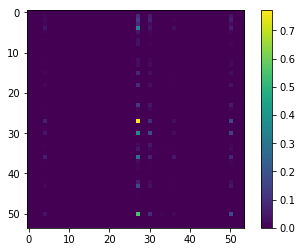

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
C = confusion_matrix(yTest,yhatTest)

Csum = np.sum(C,1)
C = C / Csum[None,:]

matrix = C
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation = 'none')
plt.colorbar()

In [61]:
S = svc.support_vectors_

matrix[27][27]
classes[27]
data[data['KY_CD']==358]['OFNS_DESC']

#print(matrix)
#np.argmax(matrix, axis=0)

322364    OFFENSES INVOLVING FRAUD
340252    OFFENSES INVOLVING FRAUD
183240    OFFENSES INVOLVING FRAUD
239633    OFFENSES INVOLVING FRAUD
303271    OFFENSES INVOLVING FRAUD
249920    OFFENSES INVOLVING FRAUD
332950    OFFENSES INVOLVING FRAUD
279894    OFFENSES INVOLVING FRAUD
67382     OFFENSES INVOLVING FRAUD
151755    OFFENSES INVOLVING FRAUD
309453    OFFENSES INVOLVING FRAUD
294423    OFFENSES INVOLVING FRAUD
285015    OFFENSES INVOLVING FRAUD
210025    OFFENSES INVOLVING FRAUD
22156     OFFENSES INVOLVING FRAUD
307762    OFFENSES INVOLVING FRAUD
1991      OFFENSES INVOLVING FRAUD
309640    OFFENSES INVOLVING FRAUD
183132    OFFENSES INVOLVING FRAUD
219827    OFFENSES INVOLVING FRAUD
87559     OFFENSES INVOLVING FRAUD
86285     OFFENSES INVOLVING FRAUD
312612    OFFENSES INVOLVING FRAUD
55518     OFFENSES INVOLVING FRAUD
241321    OFFENSES INVOLVING FRAUD
147532    OFFENSES INVOLVING FRAUD
260670    OFFENSES INVOLVING FRAUD
193769    OFFENSES INVOLVING FRAUD
57165     OFFENSES I

In [ ]:
S.shape

In [ ]:
S

In [ ]:
xTest